### Introdução à Programação de Computadores - 2020/2

# **Projeto Prático Final** 


Professores:

*   Jefersson Alex dos Santos - jefersson@dcc.ufmg.br
*   João Guilherme Maia de Menezes - jgmm@dcc.ufmg.br

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral")

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Na célula abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.



In [4]:
# Baixando os dados do site oficial (link alternativo abaixo)
#!wget https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv

# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    file = open(filename, 'r', encoding='ISO-8859-1')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("Cfem.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano de Referencia', 'Mes de Referencia', 'Processo', 'Ano do Processo', 'Tipo PF/PJ', 'CPF/CNPJ', 'Pessoa Física/Jurídica', 'Fase do Processo', 'Substância', 'Uf', 'Município', 'Unidade de Medida', 'Quantidade Comercializada', 'Valor Recolhido (CFEM)'] 

['2002', '6', '', '', 'PF', '***.000.000-**', 'Não Informado', '', '', '', '', '', '', '31']
Número total de registros: 1121646
{'Ano de Referencia': 0, 'Mes de Referencia': 1, 'Processo': 2, 'Ano do Processo': 3, 'Tipo PF/PJ': 4, 'CPF/CNPJ': 5, 'Pessoa Física/Jurídica': 6, 'Fase do Processo': 7, 'Substância': 8, 'Uf': 9, 'Município': 10, 'Unidade de Medida': 11, 'Quantidade Comercializada': 12, 'Valor Recolhido (CFEM)': 13}


Tarefa 1 - Evolução da arrecadação ao longo dos anos
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).



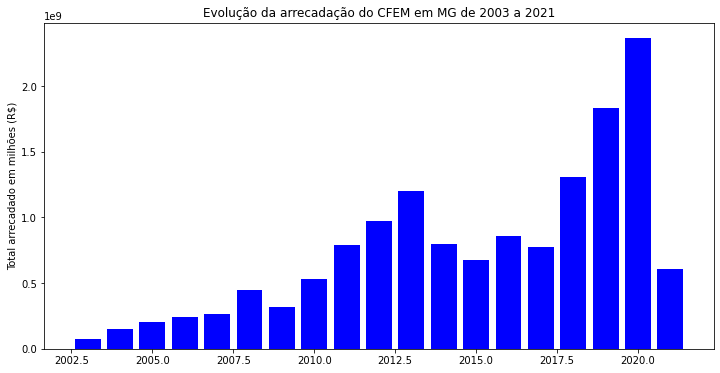

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def le_dados(filename):
    file = open(filename,'r',encoding='ISO-8859-1')
    dados = []
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
    rotulos = dados.pop(0)
    return rotulos, dados

def arrecadação_total(inicio,fim):
    rotulos, dados = le_dados("Cfem.csv")
    anos = range(inicio,fim+1)
    ano_arrecadação = {}
    for ano in anos:
        for i in range(len(dados)):
            if dados[i][9]=='MG' and int(dados[i][0])==ano:
                x = ano_arrecadação.get(ano,0)
                valor = float(dados[i][13].replace(',','.'))
                ano_arrecadação[ano] = x + valor
    return ano_arrecadação

dados = arrecadação_total(2003,2021)
ano = list(dados.keys())
arrecadação = list(dados.values())

plt.bar(ano,arrecadação,color='b')
plt.ylabel('Total arrecadado em milhões (R$)')
plt.title('Evolução da arrecadação do CFEM em MG de 2003 a 2021')

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

Tarefa 2 - Extração de bauxita por estado entre 2015 e 2020
---------

Implemente um código capaz de plotar um gráfico de barras que mostra a extração de bauxita por estado brasileiro entre os anos de 2015 e 2020. 

Digite o ano de inicio: 2015
Digite o ano fim: 2020


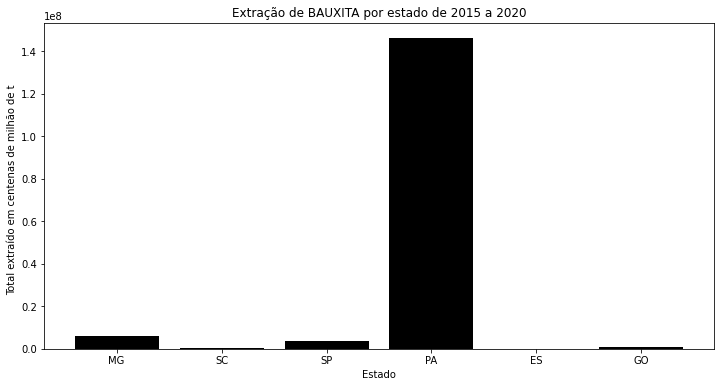

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def le_dados(filename):
    file = open(filename,'r',encoding='ISO-8859-1')
    dados = []
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    rotulos = dados.pop(0)
    return rotulos, dados

def extração_totalestados_bauxita(inicio,fim):
    rotulos, dados = le_dados("Cfem.csv")
    tempo = range(inicio,fim+1)
    estadoar = {}
    unidade = ''
    
    for ano in tempo:
        for i in range(len(dados)):
            if dados[i][8]=='BAUXITA' and int(dados[i][0])==ano:
                unidade = dados[i][11]
                estado = dados[i][9]
                x = estadoar.get(estado,0)
                if dados[i][12]=='':
                    dados[i][12]='0'
                valor = float(dados[i][12].replace(',','.'))
                estadoar[estado] = x + valor
    
    return estadoar,unidade

comeco = int(input('Digite o ano de inicio: ')) 
termino = int(input('Digite o ano fim: '))

dados,unidade = extração_totalestados_bauxita(comeco,termino)
estado = list(dados.keys())
extração = list(dados.values())

plt.bar(estado,extração,color='k')
plt.ylabel('Total extraído em centenas de milhão de %s'%(unidade))
plt.xlabel('Estado')
plt.title('Extração de BAUXITA por estado de %d a %d'%(comeco,termino))

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

Tarefa 3 - Extração de ouro por estado nos últimos dez anos.
---------

Implemente códigos para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2010 até 2020) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

Digite o ano de inicio: 2008
Digite o ano fim: 2015
Digite o nome do minério: OURO


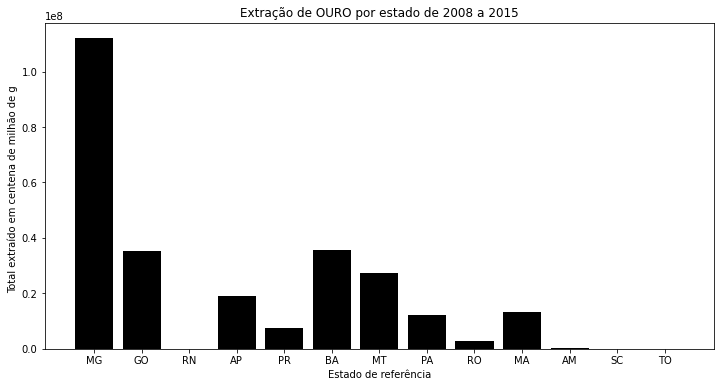

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def le_dados(filename):
    file = open(filename,'r',encoding='ISO-8859-1')
    dados = []
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    rotulos = dados.pop(0)
    return rotulos, dados

def extração_totalestados_minerio(inicio,fim,minerio):
    rotulos, dados = le_dados("Cfem.csv")
    tempo = range(inicio,fim+1)
    estado_arrecadação = {}
    unidade = ''
    
    for ano in tempo:
        for i in range(len(dados)):
            if dados[i][8]==minerio and int(dados[i][0])==ano:
                estado = dados[i][9]
                if estado!='':
                    unidade = dados[i][11]
                    x = estado_arrecadação.get(estado,0)
                    if dados[i][12]=='':
                        dados[i][12]='0'
                    valor = float(dados[i][12].replace(',','.'))
                    estado_arrecadação[estado] = x + valor
                    
            
    return estado_arrecadação,unidade

inicio = int(input('Digite o ano de inicio: ')) 
fim = int(input('Digite o ano fim: '))
minerio = input('Digite o nome do minério: ').upper()

dados,unidade = extração_totalestados_minerio(inicio,fim,minerio)
estado = list(dados.keys())
extração = list(dados.values())

plt.bar(estado,extração,color='k')
plt.ylabel('Total extraído em centena de milhão de %s'%(unidade))
plt.xlabel('Estado de referência')
plt.title('Extração de %s por estado de %d a %d'%(minerio,inicio,fim))

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará.
---------

Implemente códigos para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 1991 até 2019). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

Digite o ano de inicio: 2003
Digite o ano fim: 2019


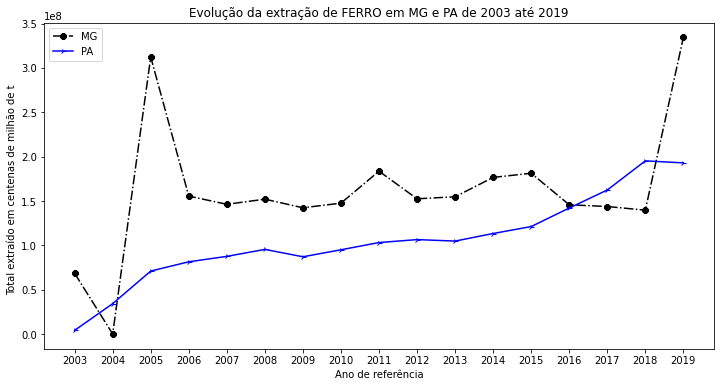

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def le_dados(filename):
    file = open(filename,'r',encoding='ISO-8859-1')
    dados = []
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    rotulos = dados.pop(0)
    return rotulos, dados

def extração_total_ferro(inicio,fim,uf):
    rotulos, dados = le_dados("Cfem.csv")
    anos = range(inicio,fim+1)
    ano_arrecadação = {}
    unidade = ''
    
    for ano in anos:
        for i in range(len(dados)):
            if dados[i][9]==uf and int(dados[i][0])==ano:
                if dados[i][8]=='FERRO':
                    x = ano_arrecadação.get(ano,0)
                    if dados[i][12]=='':
                        dados[i][12]='0'
                    valor = float(dados[i][12].replace(',','.'))
                    ano_arrecadação[ano] = x + valor
                    unidade = dados[i][11]
    
    return ano_arrecadação,unidade

inicio = int(input('Digite o ano de inicio: ')) 
fim = int(input('Digite o ano fim: '))

dados_mg,unidade = extração_total_ferro(inicio,fim,'MG')
dados_pa,unidade = extração_total_ferro(inicio,fim,'PA')

anos_mg = list(dados_mg.keys())
extração_MG = list(dados_mg.values())
anos_PA = list(dados_pa.keys())
extração_PA = list(dados_pa.values())

dados = np.array([extração_MG,extração_PA], dtype=np.float64)

X = np.arange(dados.shape[1])

cores = ['k', 'b']
marcadores = ['8', '4']
linhas = ['-.', '-']
for i in range(0, dados.shape[0]):
    plt.plot(X, dados[i], marker=marcadores[i], linestyle=linhas[i], color=cores[i])

plt.xlabel('Ano de referência')
plt.ylabel('Total extraído em centenas de milhão de %s'%(unidade))
plt.title('Evolução da extração de FERRO em MG e PA de %d a %d'%(anos_mg[0],fim))
plt.legend(['MG', 'PA'])
plt.xticks(np.arange(0, len(anos_mg)), anos_mg)

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul no ano de 2019 por tipo de minério extraído.
---------

Implemente um código para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2019. Utilize o mesmo código para plotar o mesmo gráfico para o Estado de Minas Gerais.

Sugestão 1: use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](http://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py")

Sugestão 2: por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


Digite a primeira região ou UF: SUL
Digite a segunda região ou UF: MG
Digite o ano de referência: 2019


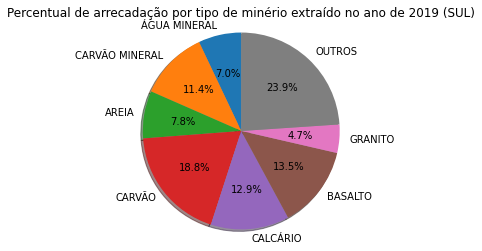

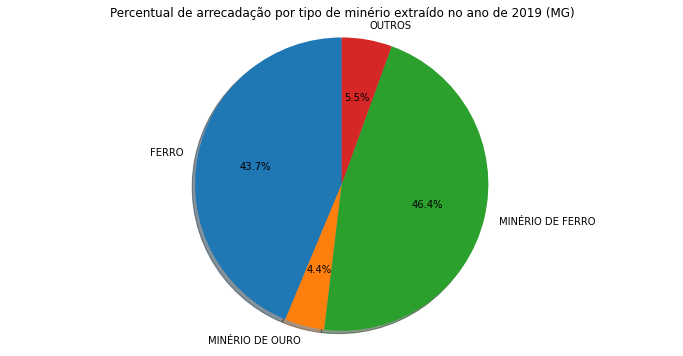

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def le_dados(filename):
    file = open(filename,'r',encoding='ISO-8859-1')
    dados = []
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    rotulos = dados.pop(0)
    return rotulos, dados

def arrecadação_minerios_ano(uf,ano):
    rotulos, dados = le_dados("Cfem.csv")
    regiões = {'SUL':['SC','PR','RS'],'SUDESTE':['MG','SP','RJ','ES'],'NORTE':['TO','PA','AP','RO','AM','AC','RR'],'NORDESTE':['MA','PI','BA','SE','AL','PE','PB','CE','RN'],'CENTRO-OESTE':['GO','MT','DF','MS']}
    if (uf in regiões) == True:
        uf = regiões[uf]
    else:
        uf = [uf]
    minerio_arrecadação1 = {}
    arrecadação_total = 0
    for i in range(len(dados)):
        if int(dados[i][0])==ano:
            if (dados[i][9] in uf) ==True:
                minerio = dados[i][8]
                arrecadação = float(dados[i][13].replace(',','.'))
                x = minerio_arrecadação1.get(minerio,0)
                minerio_arrecadação1[minerio] = x + arrecadação
                arrecadação_total = arrecadação_total + arrecadação
    
    minerio_arrecadação2 = {}
    sem = 0
    for minerio,arrecadacao in minerio_arrecadação1.items():
        proporção = (arrecadacao)/arrecadação_total
        if proporção>0.03:
            x = minerio_arrecadação2[minerio]=arrecadacao
            sem = sem + arrecadacao
            
    valor_outros = arrecadação_total - sem
    minerio_arrecadação2['OUTROS']=valor_outros

    return minerio_arrecadação2
    
    
uf1 = input('Digite a primeira região ou UF: ').upper()
uf2 = input('Digite a segunda região ou UF: ').upper()
ano = int(input('Digite o ano de referência: '))
d1 = arrecadação_minerios_ano(uf1,ano)
d2 = arrecadação_minerios_ano(uf2,ano)

m1 = list(d1.keys())
arr1 = list(d1.values())
m2 = list(d2.keys())
arrecadação2 = list(d2.values())

fig1, ax1 = plt.subplots()
ax1.pie(arr1, labels=m1, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Percentual de arrecadação por tipo de minério extraído no ano de %d (%s)'%(ano,uf1))

fig2, ax2 = plt.subplots()
ax2.pie(arrecadação2, labels=m2, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')
plt.title('Percentual de arrecadação por tipo de minério extraído no ano de %d (%s)'%(ano,uf2))

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()